### Training and Visualizing a Decision Tree

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
iris = load_iris(as_frame=True)
X_iris = iris.data[['petal length (cm)','petal width (cm)']].values 
y_iris = iris.target

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_iris,y_iris)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

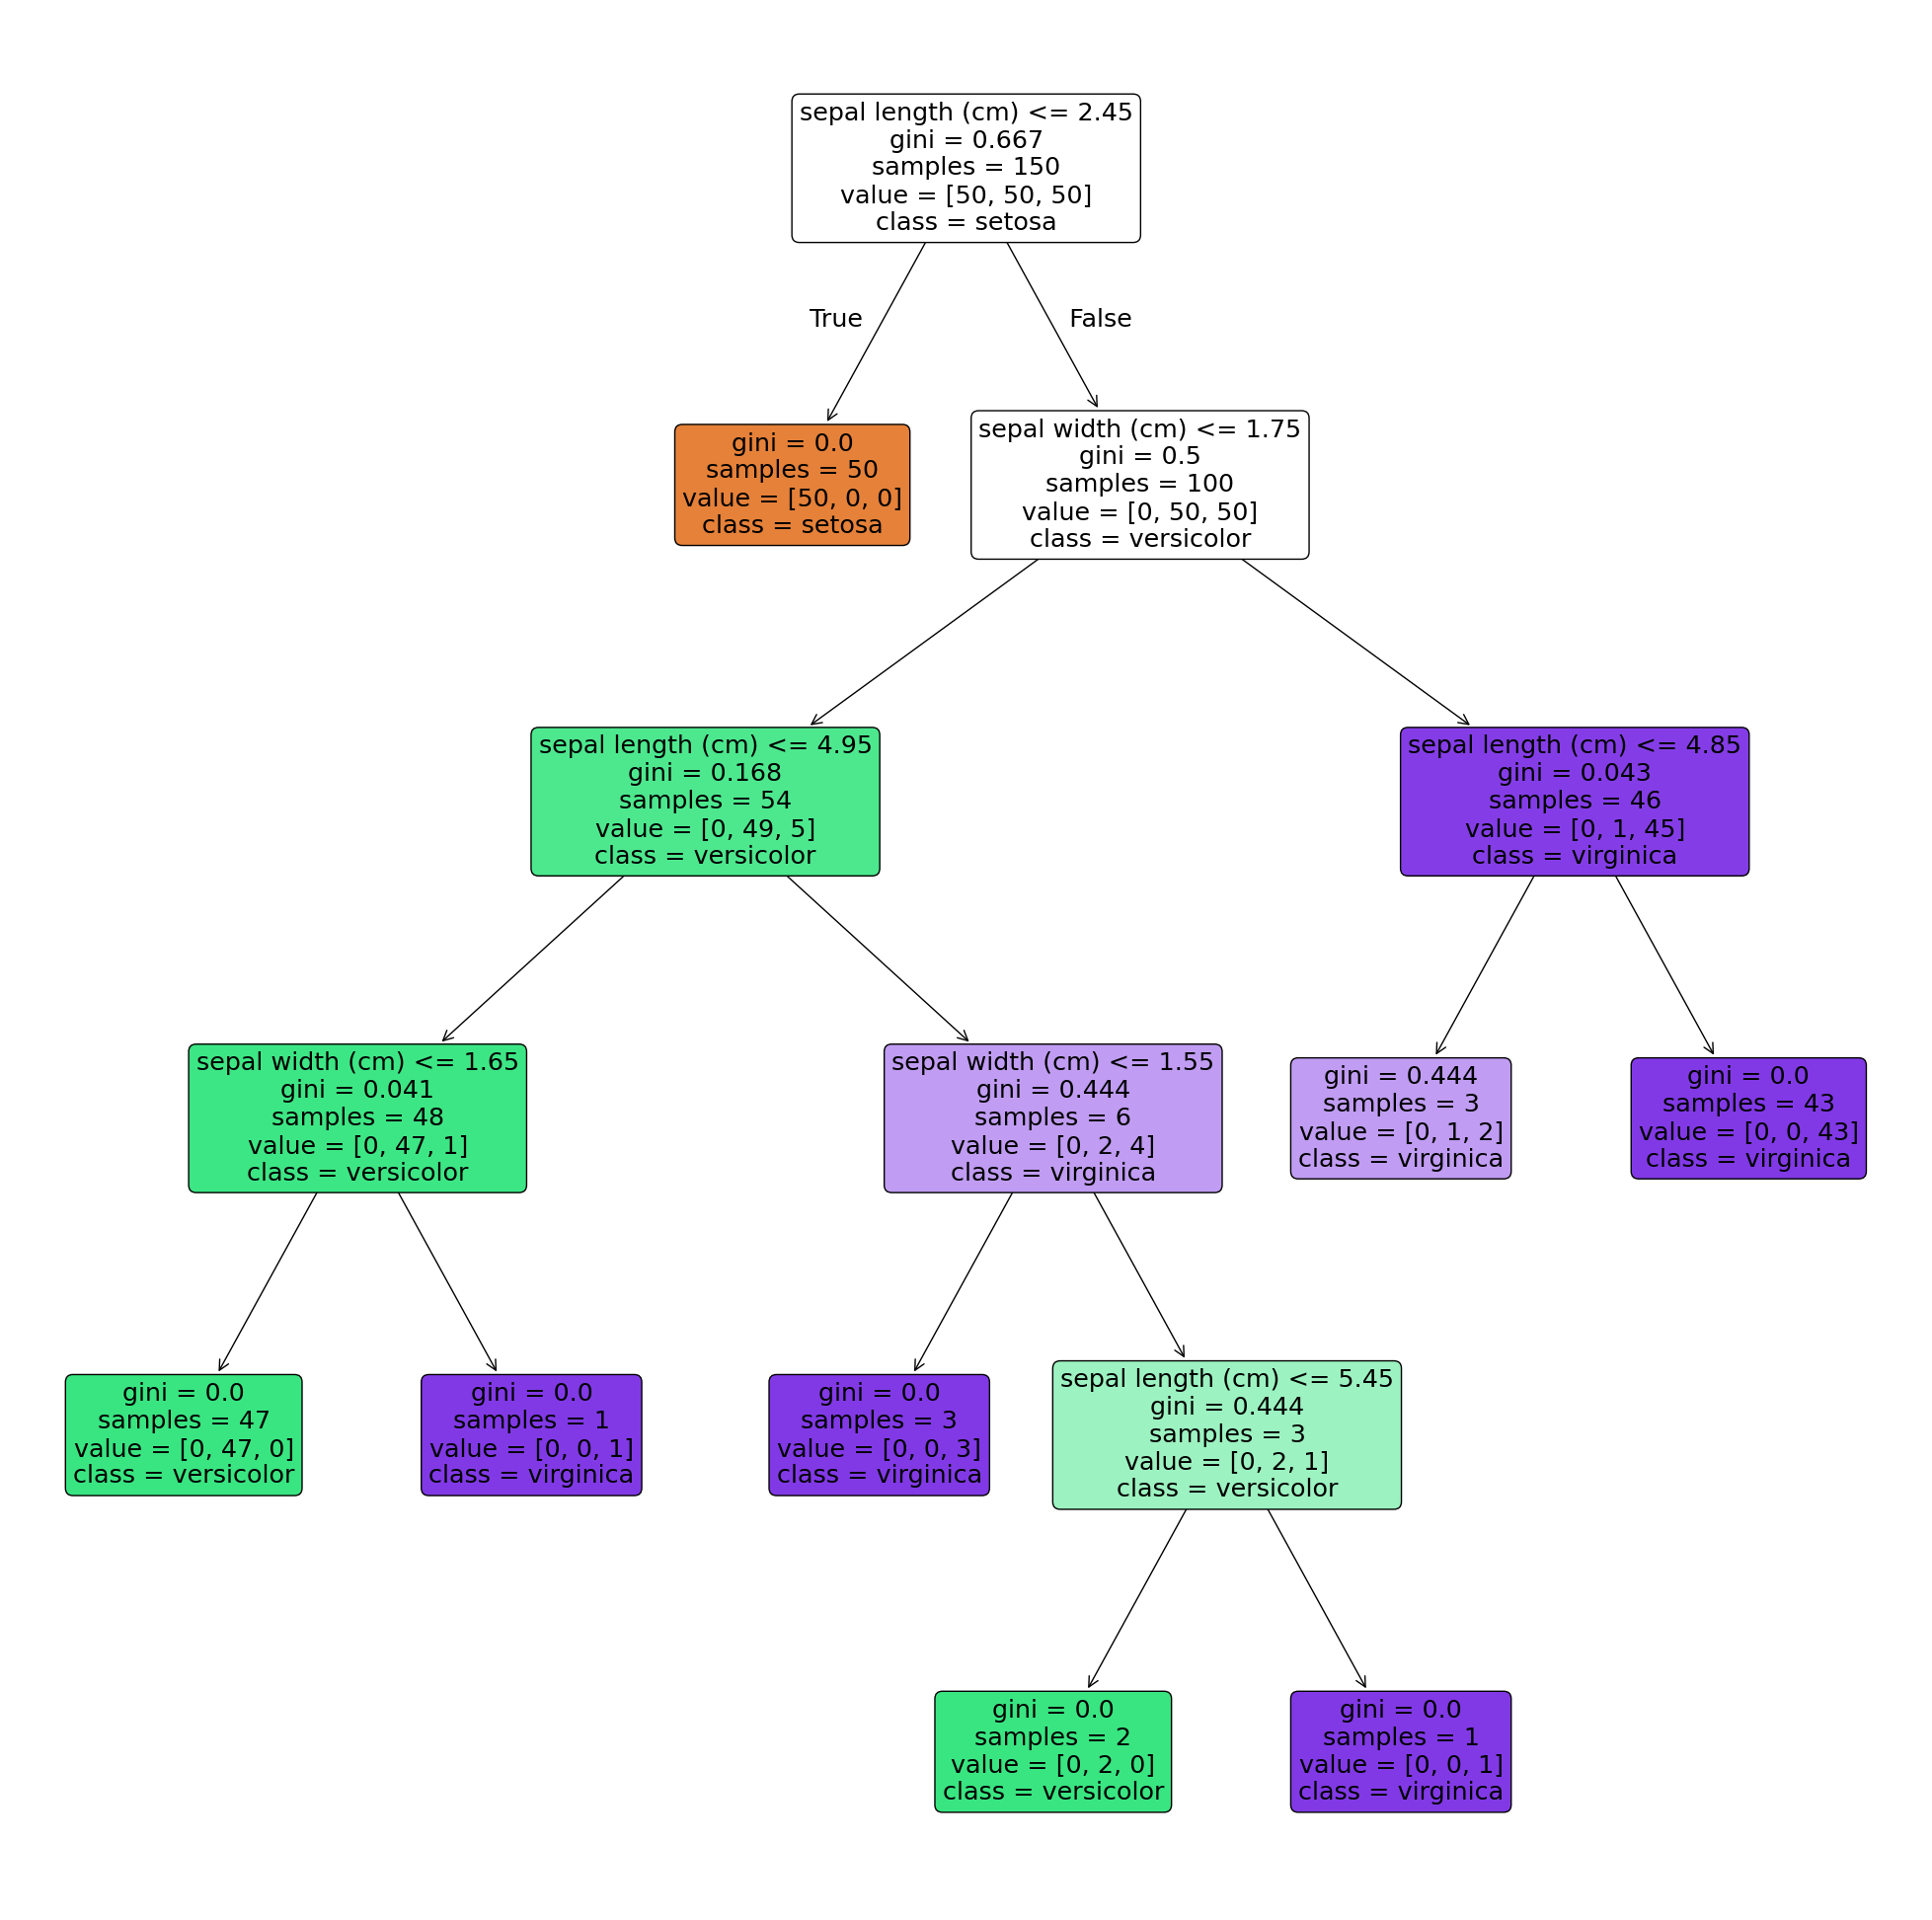

In [4]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,25))
plot_tree(tree_clf,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True)
plt.show()

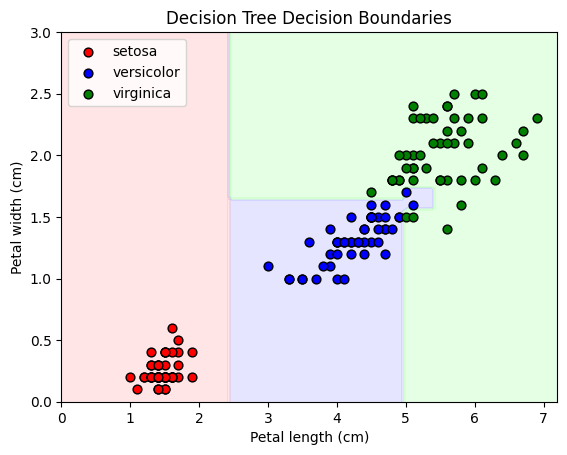

In [5]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(["#FFAAAA", "#AAAAFF", "#AAFFAA"])
cmap_bold  = ["red", "blue", "green"]

petal_length_range = np.linspace(0,7.2,100)
petal_width_range = np.linspace(0,3,100)
x0,x1 = np.meshgrid(petal_length_range,petal_width_range)
X_new = np.c_[x0.ravel(),x1.ravel()]

y_pred = tree_clf.predict(X_new).reshape(x0.shape)

plt.contourf(x0,x1,y_pred,alpha=0.3,cmap=cmap_light)
for idx, name in enumerate(iris.target_names):
    plt.scatter(
        X_iris[y_iris == idx, 0],
        X_iris[y_iris == idx, 1],
        c=cmap_bold[idx],
        label=name,
        edgecolor="k",
        s=40
    )

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.legend()
plt.title("Decision Tree Decision Boundaries")
plt.show()


2.449999988079071 1.75 4.950000047683716 4.8500001430511475


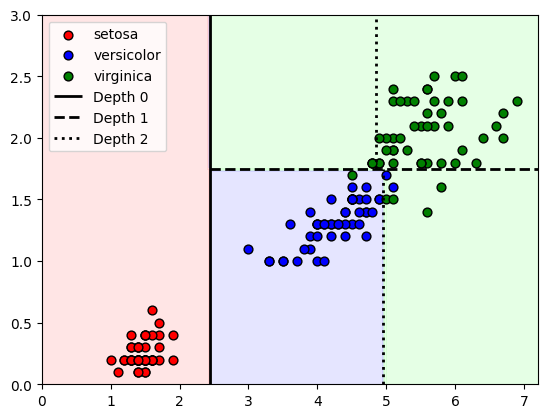

In [6]:
# deeper tree visualization better plot
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(["#FFAAAA", "#AAAAFF", "#AAFFAA"])
cmap_bold  = ["red", "blue", "green"]

petal_length_range = np.linspace(0,7.2,100)
petal_width_range = np.linspace(0,3,100)
x0,x1 = np.meshgrid(petal_length_range,petal_width_range)
X_new = np.c_[x0.ravel(),x1.ravel()]


tree_clf_deeper = DecisionTreeClassifier(max_depth=3,random_state=42)
tree_clf_deeper.fit(X_iris,y_iris)

y_pred = tree_clf_deeper.predict(X_new).reshape(x0.shape)

plt.contourf(x0,x1,y_pred,alpha=0.3,cmap=cmap_light)
for idx, name in enumerate(iris.target_names):
    plt.scatter(
        X_iris[y_iris == idx, 0],
        X_iris[y_iris == idx, 1],
        c=cmap_bold[idx],
        label=name,
        edgecolor="k",
        s=40
    )
# extract the thresholds by passing the array of indexs for which we want to retrieve
th0,th1,th2a,th2b = tree_clf_deeper.tree_.threshold[[0,2,3,6]]  
print(th0,th1,th2a,th2b)

plt.vlines(th0, ymin=0, ymax=3, colors="k", linewidth=2,label="Depth 0")
plt.hlines(th1, xmin=th0, xmax=7.2, colors="k", linestyles="--", linewidth=2,label="Depth 1")
plt.vlines([th2a, th2b],
           ymin=[0, th1],
           ymax=[th1, 3],
           colors="k",
           linestyles=":",
           linewidth=2,
           label="Depth 2")
plt.axis([0, 7.2, 0, 3])
plt.legend()
plt.show()


### Estimating the class prob

In [7]:
tree_clf.predict_proba([[5,1.5]]).round(3)

array([[0., 0., 1.]])

In [8]:
tree_clf.predict([[5,1.5]])

array([2])

### Regularizing Hyperparameters

In [9]:
from sklearn.datasets import make_moons

X_moons,y_moons = make_moons(n_samples=150,noise=0.2,random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5,random_state=42)
tree_clf1.fit(X_moons,y_moons)
tree_clf2.fit(X_moons,y_moons)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

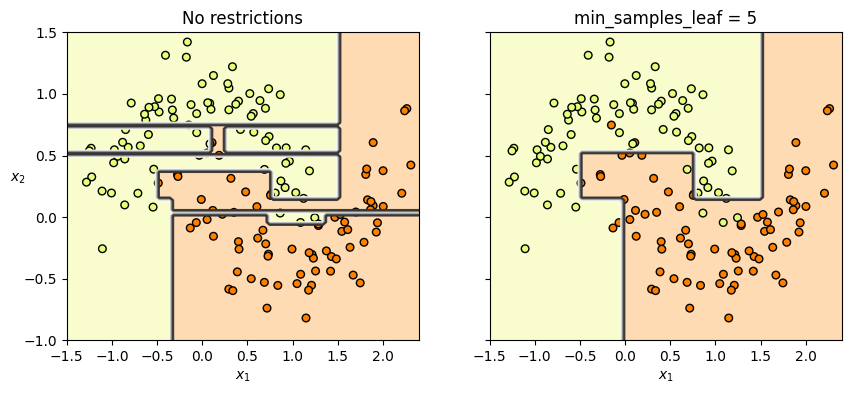

In [13]:
def plot_decision_boundary(clf,X,y,axes,cmap):
    x1,x2 = np.meshgrid(np.linspace(axes[0],axes[1],100),
                        np.linspace(axes[2],axes[3],100))
    
    X_new = np.c_[x1.ravel(),x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=cmap)
    plt.contour(x1,x2,y_pred,cmap="Greys",alpha=0.8)

    plt.scatter(X[:,0],X[:,1],
                c=y,
                cmap=cmap,
                edgecolors='k',
                s=30)
    
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$",rotation=0)


fig,axes = plt.subplots(ncols=2,nrows=1,figsize=(10,4),sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1,X_moons,y_moons,
                       axes=[-1.5,2.4,-1,1.5],
                       cmap='Wistia')

plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2,X_moons,y_moons,
                       axes=[-1.5,2.4,-1,1.5],
                       cmap='Wistia')

plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")

plt.show()


In [14]:
X_moons_test,y_moons_test = make_moons(n_samples=1000,noise=0.2,random_state=42)
tree_clf1.score(X_moons_test,y_moons_test)

0.901

In [15]:
tree_clf2.score(X_moons_test, y_moons_test)


0.918